<a href="https://colab.research.google.com/github/Nataliawijayaa/Online-Retail-Sales_Mini-Case/blob/main/Online_Retail_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mini Case

# Measuring the Performance of Online Retail Sales

## Load Data

In [3]:
import pandas as pd
df = pd.read_csv('/content/online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Section 1

### Create New Feature: Year

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [5]:
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
708058,552558,22429,ENAMEL MEASURING JUG CREAM,4,2011-05-10 11:33:00,4.25,14766.0,United Kingdom,2011
714059,553048,22197,SMALL POPCORN HOLDER,12,2011-05-13 10:02:00,0.85,14291.0,United Kingdom,2011
802872,561112,21718,RED METAL BEACH SPADE,2,2011-07-25 11:53:00,1.25,14606.0,United Kingdom,2011
175342,506003,22508,DOORSTOP RETROSPOT HEART,8,2010-04-27 11:15:00,3.75,16652.0,United Kingdom,2010
960980,574076,21175,GIN + TONIC DIET METAL SIGN,2,2011-11-02 15:38:00,4.96,NaN,United Kingdom,2011


### Filtering Data

In [6]:
sales = df[(df['Quantity']>=1) & (~(df['Invoice'].str.contains('c', case=False, na=False)))]
sales

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Create New Feature: Revenue

In [7]:
df['Revenue'] = df['Quantity'] * df['Price']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
 8   Year         1067371 non-null  int64         
 9   Revenue      1067371 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 81.4+ MB


### Average of Revenue per Year

In [8]:
df['Year'].value_counts()

2010    522714
2011    499429
2009     45228
Name: Year, dtype: int64

In [9]:
avg = df.pivot_table(index='Year', values='Revenue', aggfunc='mean').reset_index()
avg

,Year,Revenue
0,2009,17.684777
1,2010,18.152555
2,2011,18.018195


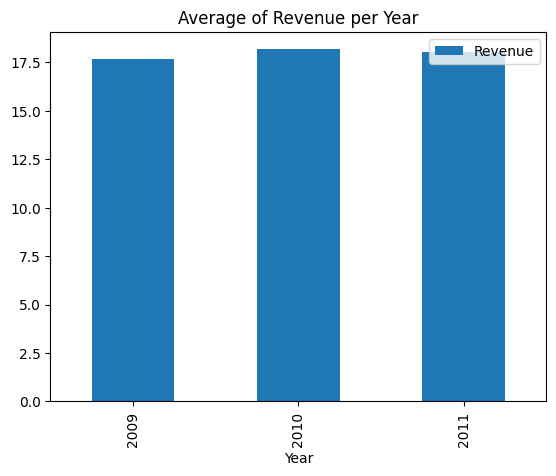

In [10]:
import matplotlib.pyplot as plt
avg.plot(x='Year', y='Revenue', kind='bar')
plt.title('Average of Revenue per Year')
plt.show()

### Interpretation

According to the data and the chart, it shows that the average of the revenue in each year is not much different, still in the range of 17 to 18. In 2009, the revenues were 17.68 and in 2010, it increased slightly, reaching 18.15. On the other hand, in 2011, it decreased slightly to 18.018 but was still above the average in 2009.

## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [11]:
finished = sales[sales['Customer ID'].notnull()]
finished

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


#### Customers who canceled their purchases

In [12]:
canceled = df[df['Invoice'].str.contains('c', case=False, na=False)]
canceled

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,-35.40
...,...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011,-9.13
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011,-224.69
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011,-54.75
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011,-1.25


### Number of Finished and Canceled Transactions Each Year

In [13]:
num_finished = finished.pivot_table(index='Year', values='Invoice', aggfunc='count')
num_finished = num_finished.rename(columns={'Invoice':'Finished'})
num_finished

,Finished
Year,
2009,30761
2010,403094
2011,371765


In [19]:
num_canceled = canceled.pivot_table(index='Year', values='Invoice', aggfunc='count')
num_canceled = num_canceled.rename(columns={'Invoice':'Canceled'})
num_canceled

,Canceled
Year,
2009,1015
2010,9919
2011,8560


In [20]:
merge = num_finished.merge(num_canceled, on='Year').reset_index()
merge

,Year,Finished,Canceled
0,2009,30761,1015
1,2010,403094,9919
2,2011,371765,8560


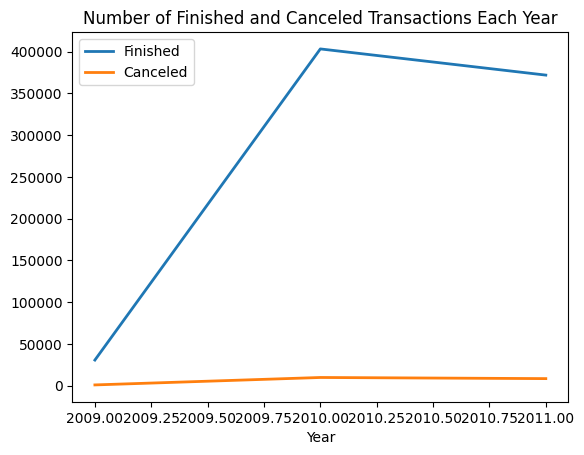

In [21]:
merge.plot(x='Year', y=['Finished', 'Canceled'], linewidth=2.0)
plt.title('Number of Finished and Canceled Transactions Each Year')
plt.show()

### Cancellation Rate

In [22]:
total_num = df.pivot_table(index='Year', values='Invoice', aggfunc='count')
total_num = total_num.rename(columns={'Invoice':'total_number'})
total_num

,total_number
Year,
2009,45228
2010,522714
2011,499429


In [24]:
cancel_rate = pd.DataFrame(data = ((num_canceled['Canceled'] / total_num['total_number']) * 100), columns = ['Cancellation Rate'])
cancel_rate

,Cancellation Rate
Year,
2009,2.244185
2010,1.897596
2011,1.713957


### Interpretation

According to the chart, it indicates that total number of customers who canceled the transactions are not many compared to the number of customers who finished the transaction each year. Besides, the cancellation rate is also not too high, where in 2009, the cancellation rate compromise 2.24% and gradually decreased in 2010 and 2011, which are 1.90% and 1.71% respectively.